In [47]:
# Quelques imports 
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from scipy.stats import kde
import numpy as np
import seaborn as sns

# Ici je trouve le dossier dans lequel est rangée la carte
os.chdir('C:/Users/theot/Desktop/srcipt_pe/')

In [48]:
#Lecture du fichier
file = "Historique des positions.json"
df = pd.read_json(file)


donnee=df.get("locations")

In [49]:
#On s'apprête à récupérer les données de latitude, longitude et temps dans des listes
lat=[]
long=[]
temps=[]

#Je filtre le temps sur mes données (je ne veux garder que les données récoltées après le dimanche 11 dévrier 19h)
l='Sun Feb  11 19:00:00 2018'
t=time.strptime(l)
t=time.mktime(t)

for i in range(len(donnee)):
    if t<int(donnee[i]["timestampMs"])/1000:
        lat.append(donnee[i]["latitudeE7"]/1e7)
        long.append(donnee[i]["longitudeE7"]/1e7)
        temps.append(donnee[i]["timestampMs"])
        
len(lat)==len(long)

True

In [53]:
#Je crée 3 figures

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13.42, 12))

#figure 1
axes[0].set_title('Scattering Points')
axes[0].scatter(long,lat)

#figure 2
axes[1].set_title('Hexbin Diagram')
nbins=60
b= axes[1].hexbin(long, lat, gridsize=(nbins+10,nbins+10), cmap=plt.cm.gist_heat_r)
fig.colorbar(b, ax=axes[1],fraction=0.046, pad=0.04)

#figure 3
nbins=150
k = kde.gaussian_kde([long, lat])
xi, yi = np.mgrid[(min(long)):(max(long)):nbins*1j, min(lat):max(lat):nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axes[2].set_title('Density')
axes[2].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.gist_heat_r)
axes[2].contour(xi, yi, zi.reshape(xi.shape))


In [54]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width
fig_size[0] = 13.42
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

datafile = 'carte_centrale_petite.png'
img = plt.imread(datafile)

#adding map
axes[0].imshow(img, zorder=0, extent=[4.764941,4.771872,45.780469,45.786155])
axes[1].imshow(img, zorder=0, extent=[4.764941,4.771872,45.780469,45.786155])
axes[2].imshow(img, zorder=0, extent=[4.764941,4.771872,45.780469,45.786155])

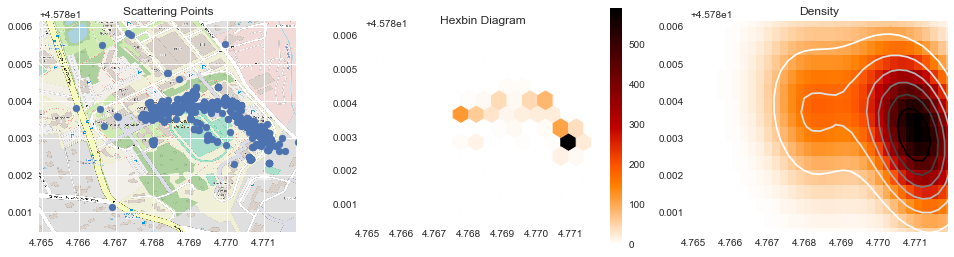

In [55]:
x=np.array(lat)
y=np.array(long)

fig.tight_layout()


plt.show()

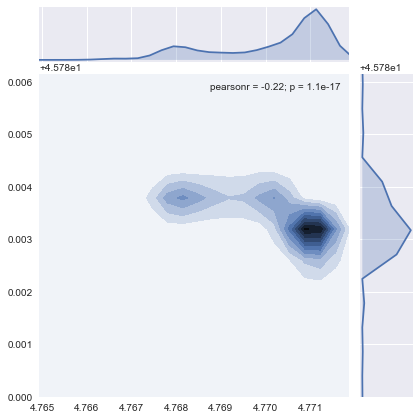

In [66]:
#On peut aussi utiliser le module seaborn

sns.jointplot(y,x, kind = "kde",ylim=(45.78,45.786155),xlim=(4.764941,4.771872))

sns.plt.show()